In [ ]:
"""
Niboon Boonprakob 
61340500038 

"""

## 3. Exploring data tables with Pandas

1. Use Pandas to read the house prices data. How many columns and rows are there in this dataset?
2. The first step I usually do is to use commands like pandas.head() to print a few rows of data. Look around what kind of features are available and read data description.txt for more info. Try to understand as much as you can. Pick three features you think will be good predictors of house prices and explain what they are.
3. How many unique conditions are there in SaleCondition? Use Pandas to find out how many samples are labeled with each condition. What do you learn from doing this?
4. Select one variable you picked in b., do you want to know something more about that variable? Use Pandas to answer your own question and de- scribe what you did shortly here.

In [116]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [117]:
from scipy import stats
import numpy as np
import pandas as pd
import seaborn as sns
import pylab
import matplotlib.pyplot as plt

In [118]:
# 3.1
data = pd.read_csv('/content/drive/MyDrive/AI/FRA 311 Artificial Intelligence/Labs/Lab 1/train.csv')
data.shape
print(f"Columns : {data.shape[0]} Row : {data.shape[1]}")

Columns : 1460 Row : 81


In [119]:
# 3.2
data.head(10)

"""
ผมจะเลือก 3 feature ที่มีผลกับ model มากที่สุด 
1. TotalBsmtSF
2. 1stFlrSF
3. GrLivArea
ที่เลือกข้อ 1 เพราะพื้นที่ชั้นใต้ดินเอาไว้เก็บของ น่าจะทำให้ราคานั้นสูงขึ้น 
ที่เลือกข้อ 2 เพราะพื้นที่ชั้นบนสุดก็สำคัญเอาไว้รับแขก น่าจะมีผลก็ราคา 
ที่เลือกข้อ 3 เพราะ พื้นในแต่ละชั้นเท่าที่ดูแล้ว สามารถนำมาทำนายผลได้ดี 
"""

'\nผมจะเลือก 3 feature ที่มีผลกับ model มากที่สุด \n1. TotalBsmtSF\n2. 1stFlrSF\n3. GrLivArea\nที่เลือกข้อ 1 เพราะพื้นที่ชั้นใต้ดินเอาไว้เก็บของ น่าจะทำให้ราคานั้นสูงขึ้น \nที่เลือกข้อ 2 เพราะพื้นที่ชั้นบนสุดก็สำคัญเอาไว้รับแขก น่าจะมีผลก็ราคา \nที่เลือกข้อ 3 เพราะ พื้นในแต่ละชั้นเท่าที่ดูแล้ว สามารถนำมาทำนายผลได้ดี \n'

In [120]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [121]:
# 3.3
data["SaleCondition"].value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

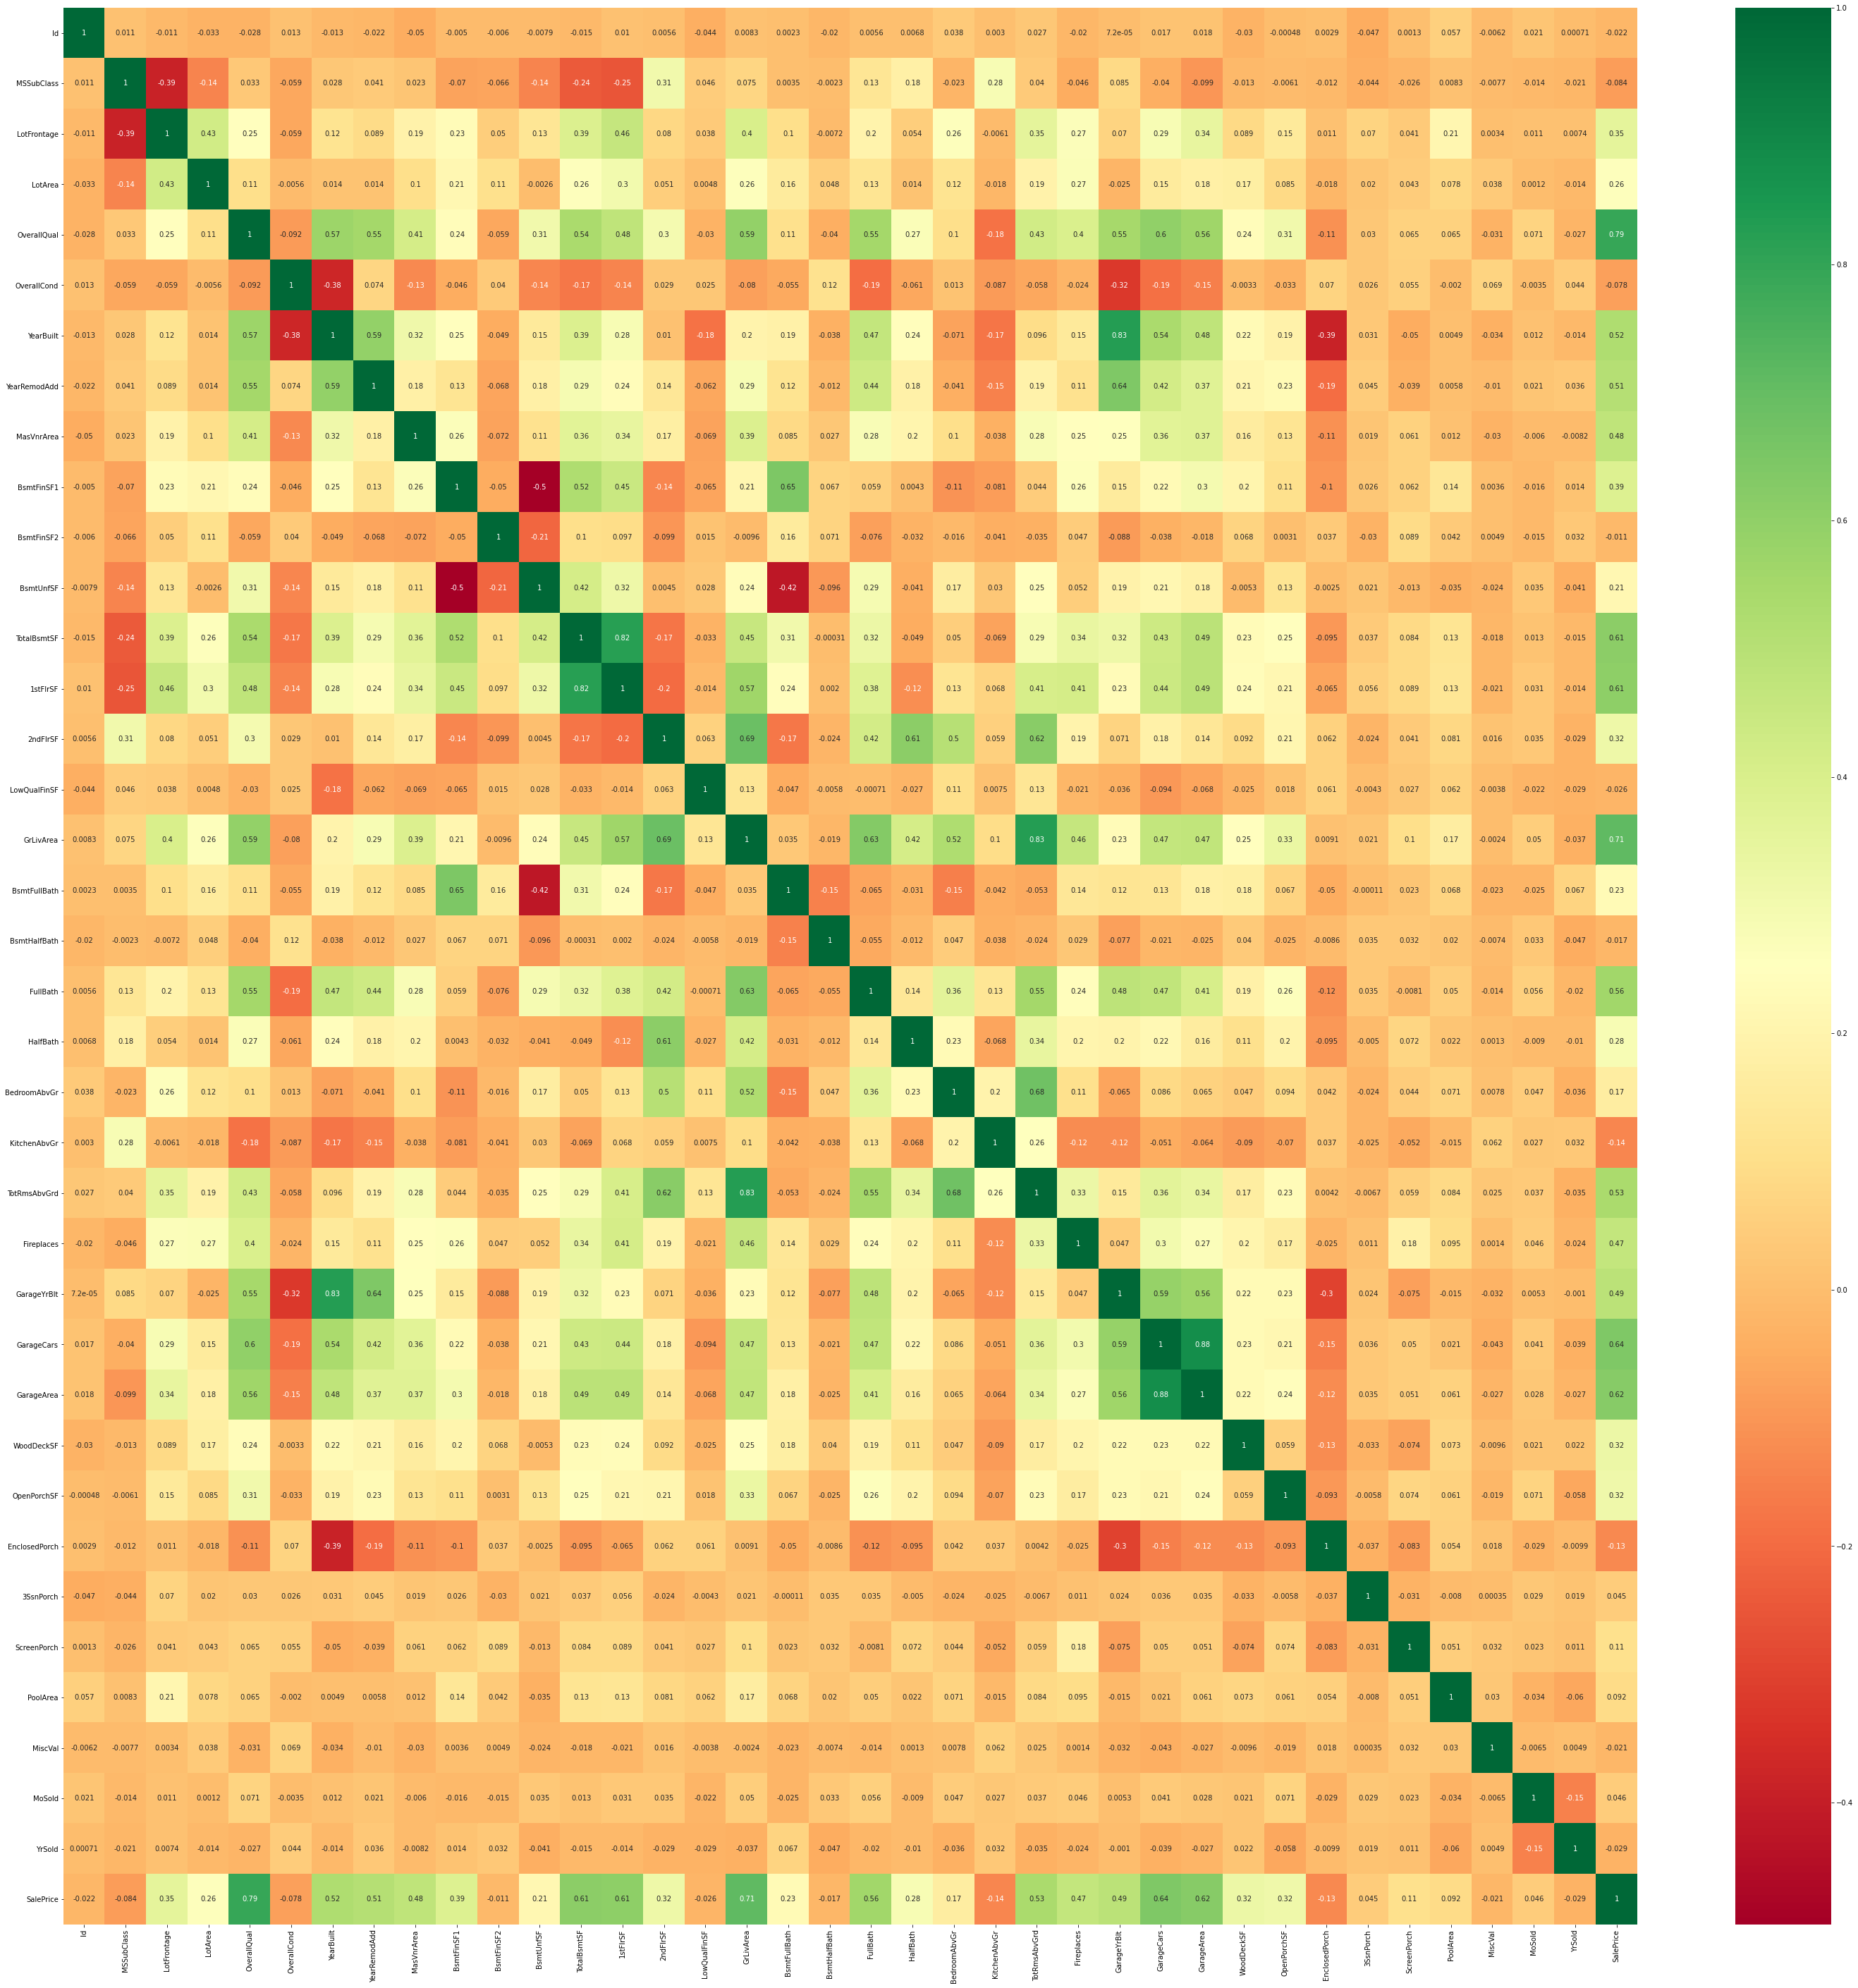

In [122]:
#3.4
# Select TotalBsmtSF
x = data.iloc[:,0::]
y = data.iloc[:,-1]

corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(50,50))
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

# จะเห็นว่า TotalBsmtSF มีผลก็ feature อื่นๆ เหมือนกันทำให้ในการ predict จะมีความแม่นยัมากขึ้นแต่จะไม่สามารถทำตรงๆได้เนื่องจากข้อมูลนั้นยังไม่ได้ทำการ 
# Cleaning Data 

## 4. Learning to explore data with Seaborn

1. Let us first look at the variable we want to predict SalePrice. Use Seaborn to plot histogram of sale prices. What do you notice in the histogram?
2. Plot the histogram of the LotArea variable. What do you notice in the histogram?
3. Use Seaborn to plot LotArea in the x-axis and SalePrice on the y-axis. Try plotting log(LotArea) versus log(SalePrice) and see if the plot looks better.

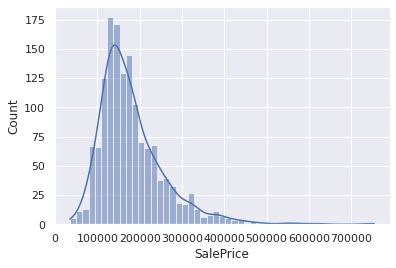

In [123]:
sns.set_theme()
sns.histplot(data['SalePrice'],kde=True);

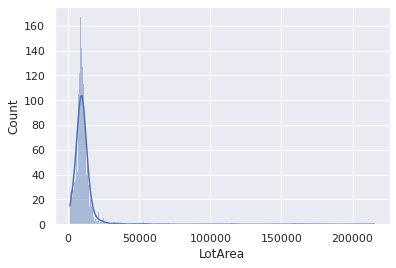

In [124]:
sns.histplot(data["LotArea"],kde=True);

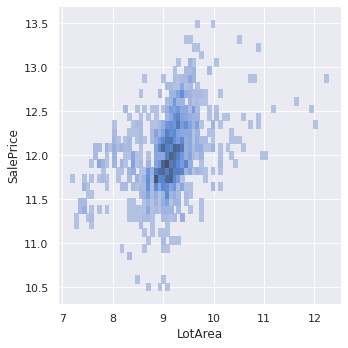

In [125]:
# Create a visualization
sns.displot(x=np.log(data.LotArea ), y = np.log(data.SalePrice))

## 5. Dealing with missing values

1. Suppose we want to start the first step of house price modeling by exploring the relationship between four variables: MSSubClass, LotArea, LotFrontage and SalePrice. I have done some exploring and found out that LotFrontage has a lot of missing values, so you need to fix it.
2. LotFrontage is the width of the front side of the property. Use Pandas to find out how many of the houses in our database is missing LotFrontage value.
3. Use Pandas to replace NaN values with another number. Since we are just exploring and not modeling yet, you can simply replace NaN with zeros for now.

In [126]:
#database is missing LotFrontage value
print(f"database is missing LotFrontage value : {data['LotFrontage'].isnull().sum()}")

database is missing LotFrontage value : 259


In [127]:
np.where(data["LotFrontage"].isnull())[0]

array([   7,   12,   14,   16,   24,   31,   42,   43,   50,   64,   66,
         76,   84,   95,  100,  104,  111,  113,  116,  120,  126,  131,
        133,  136,  147,  149,  152,  153,  160,  166,  169,  170,  177,
        180,  186,  191,  203,  207,  208,  214,  218,  221,  234,  237,
        244,  249,  269,  287,  288,  293,  307,  308,  310,  319,  328,
        330,  335,  342,  346,  347,  351,  356,  360,  361,  364,  366,
        369,  370,  375,  384,  392,  393,  404,  405,  412,  421,  426,
        447,  452,  457,  458,  459,  465,  470,  484,  490,  496,  516,
        518,  529,  537,  538,  539,  541,  545,  559,  560,  564,  569,
        580,  593,  610,  611,  612,  616,  623,  626,  641,  645,  660,
        666,  668,  672,  679,  682,  685,  687,  690,  706,  709,  714,
        720,  721,  726,  734,  745,  746,  751,  757,  770,  783,  785,
        789,  791,  794,  811,  816,  817,  822,  828,  840,  845,  851,
        853,  855,  856,  859,  865,  868,  879,  8

0       65.0
1       80.0
2       68.0
3       60.0
4       84.0
        ... 
1455    62.0
1456    85.0
1457    66.0
1458    68.0
1459    75.0
Name: LotFrontage, Length: 1460, dtype: float64

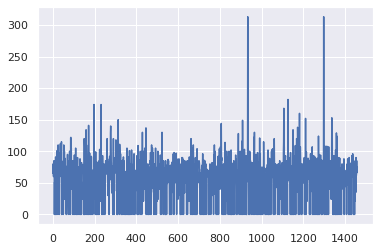

In [128]:
# Check data
data["LotFrontage"] = data["LotFrontage"].replace(np.nan , 0)
data["LotFrontage"].plot();
data["LotFrontage"]

## 6. Correlations between multiple variables

One incredible feature of Seaborn is the ability to create correlation grid with pairplot function. We want to create one single plot that show us how all variables are correlated.
1. First, you need to create a data table with four columns: MSSubClass, LotArea (with log function applied), LotFrontage (missing values replaced) and SalePrice (with log function applied).
2. Then, use pairplot to create a grid of correlation plots. What do you observe from this plot?

In [129]:
# Create a data table
MSSubClass = data['MSSubClass']
LotArea = data['LotArea']
LotFrontage = data['LotFrontage']
SalePrice = data['SalePrice']

In [130]:
import numpy as np
LotArea_log =  np.log(LotArea)
s_log = np.log(SalePrice)

LotFrontage = LotFrontage.replace(np.nan , "")

In [131]:
# Group data
dataframe = pd.DataFrame({'MSSubClass' : MSSubClass ,
                          'LotArea':LotArea_log,
                          'LotFrontage':LotFrontage,
                          'SalePrice' : s_log})
dataframe

,MSSubClass,LotArea,LotFrontage,SalePrice
0,60,9.041922,65.0,12.247694
1,20,9.169518,80.0,12.109011
2,60,9.328123,68.0,12.317167
3,70,9.164296,60.0,11.849398
4,60,9.565214,84.0,12.429216
...,...,...,...,...
1455,60,8.976768,62.0,12.072541
1456,20,9.486076,85.0,12.254863
1457,70,9.109636,66.0,12.493130
1458,20,9.181632,68.0,11.864462


In [132]:
dataframe_new = dataframe.sample(frac=1).reset_index(drop=True)
dataframe_new

,MSSubClass,LotArea,LotFrontage,SalePrice
0,30,8.752107,60.0,11.134589
1,120,8.897409,60.0,12.533576
2,80,9.554781,0.0,12.103486
3,20,9.305651,0.0,11.944708
4,30,8.326033,56.0,10.858999
...,...,...,...,...
1455,60,8.909100,66.0,12.384219
1456,20,9.011524,71.0,11.874090
1457,60,9.159573,0.0,12.312682
1458,20,8.897546,64.0,12.178187


In [133]:
dataframe_new.to_csv('/content/drive/MyDrive/Colab Notebooks/train_new.csv',index=False)
dataframe_new

,MSSubClass,LotArea,LotFrontage,SalePrice
0,30,8.752107,60.0,11.134589
1,120,8.897409,60.0,12.533576
2,80,9.554781,0.0,12.103486
3,20,9.305651,0.0,11.944708
4,30,8.326033,56.0,10.858999
...,...,...,...,...
1455,60,8.909100,66.0,12.384219
1456,20,9.011524,71.0,11.874090
1457,60,9.159573,0.0,12.312682
1458,20,8.897546,64.0,12.178187


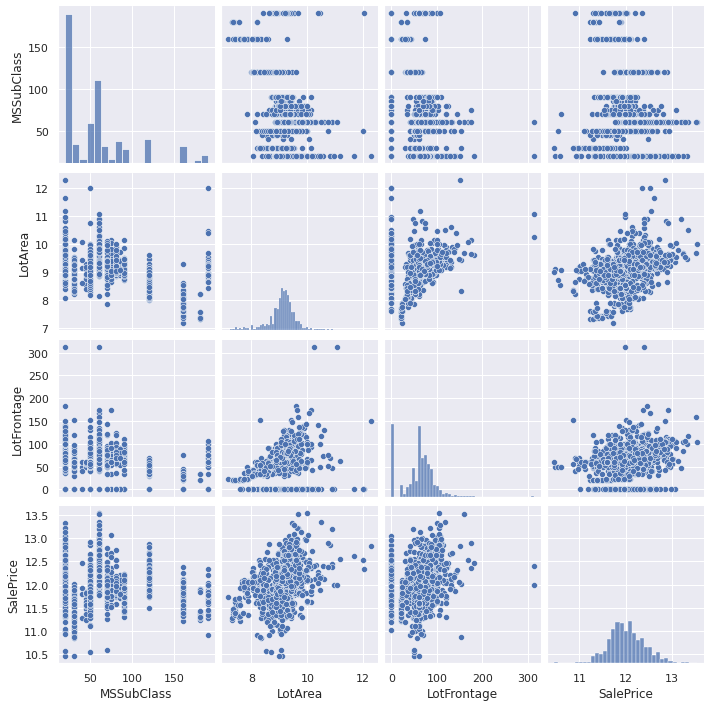

In [134]:
sns.pairplot(data = dataframe_new);

## 7. Data Preparation

Let's prepare train.csv for model training

1. Pick columns that are numeric data and plot distributions of those data (with Seaborn). If you find a column with skewed distribution you will write a script to transform that column with a log function. Then standardize them.
2. For categorical variables, we will simply transform categorical data into numeric data by using function `pandas.get dummies()`.
3. Split data into x and y. The variable x contains all the house features except the SalePrice. y contains only the SalePrice.

In [92]:
dataframe = pd.read_csv('/content/drive/MyDrive/AI/FRA 311 Artificial Intelligence/Labs/Lab 1/train.csv')
dataframe

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,...,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,...,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,...,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,G

In [93]:
numeric_features = dataframe.select_dtypes(include=[np.number])
len(numeric_features.dtypes)

38

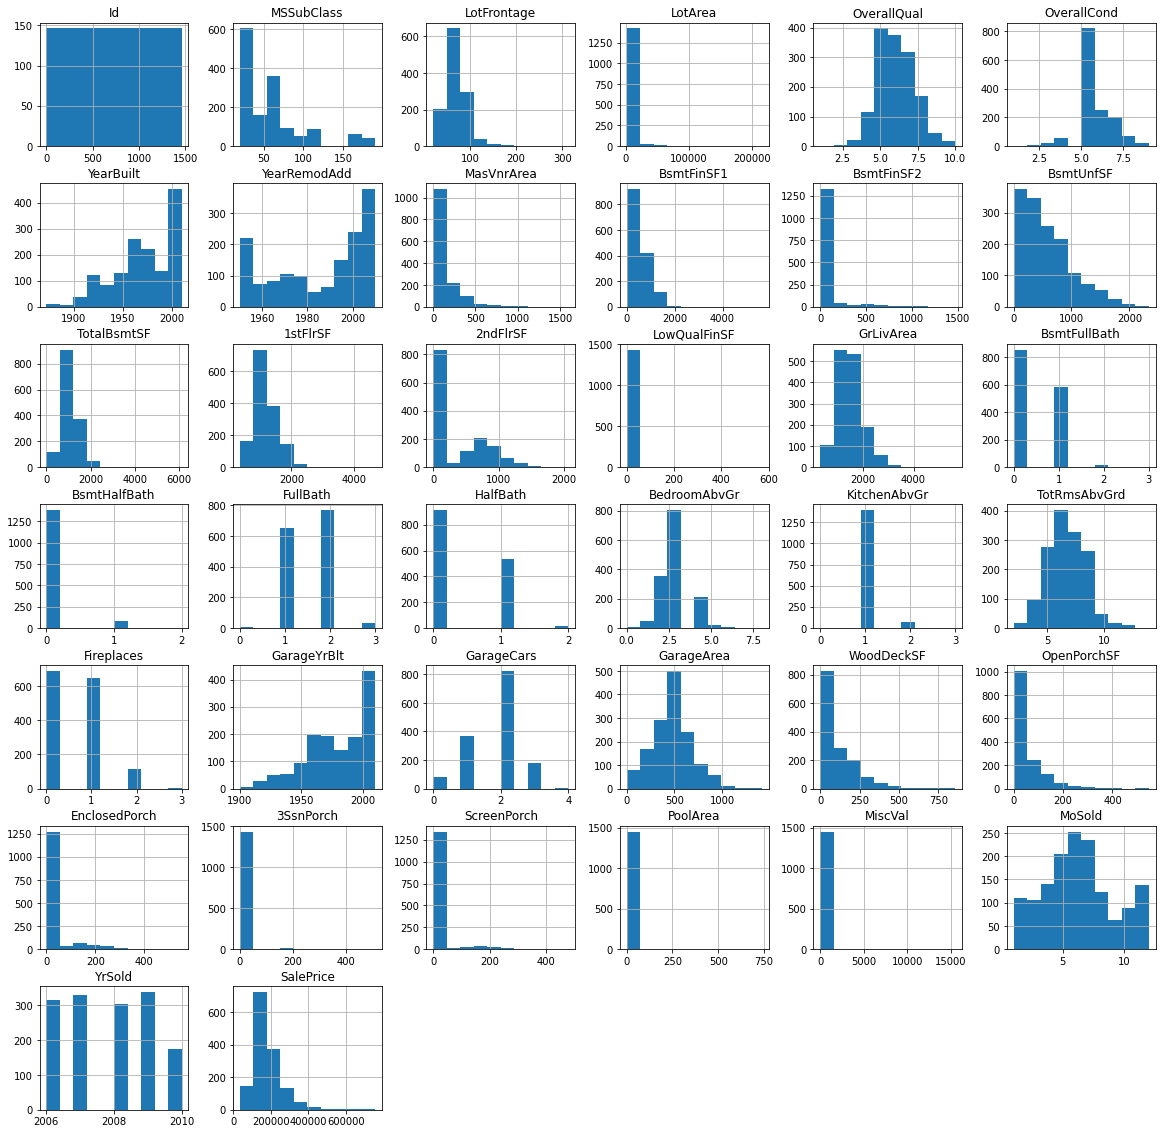

In [94]:
dataframe.hist(figsize=(20,20));

In [95]:
skewValue = dataframe.skew(axis=1)
print(skewValue)

0       6.146334
1       6.134972
2       6.138704
3       6.116070
4       6.132632
          ...   
1455    6.141124
1456    6.125196
1457    6.151234
1458    6.115871
1459    6.117535
Length: 1460, dtype: float64


In [96]:
dataframe.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [97]:
# from scipy.stats import kurtosis
# from scipy.stats import skew
# from scipy.stats import boxcox as bxcx

# dataframe = dataframe.select_dtypes(include=['number']).drop("Id" , axis = 1 )
# column = dataframe.columns.tolist()
# for i in column:
#   skew_ = skew(dataframe[i] , nan_policy = "omit")
#   log_resp = np.log(dataframe[i])
#   if (skew_ > 0.5 and 0 not in dataframe[i]):
#     sns.histplot(data = log_resp , nan_policy = "omit")
#     skew_ = skew(log_resp,nan_policy="omit")
#     dataframe[i] = log_resp
#     print(skew_)
#   elif (skew_ > 0.5 and 0 in dataframe[i]):
#     lssqrt_resp = dataframe[i] ** 0.5 
#     sns.histplot(data = lssqrt_resp , kde = True)
#     skew_ = skew(lssqrt_resp , nan_policy="omit")
#     dataframe[i] = log_resp
#     print(skew_)
#   # elif (skew_ < 0.5):
#   #   boxcox = bxcx(dataframe[i])
#   #   sns.histplot(data = boxcox , kde = True)
#   #   skew_ = skew(boxcox , nan_policy="omit")
#   #   print(skew_)
#   else:
#     print(skew_)
#     sns.histplot(data=dataframe[i], kde = True)
#   plt.show()

# plot สูงสุดคือ ปี 
# from sklearn import preprocessing
# def Pre_processing (csv_file):
#     df = pd.read_csv(str(csv_file))
#     df = df.fillna(mean)
#     num_data = df._get_numeric_data()
#     numeric = []
#     columns = []
#     for i in num_data : 
#        # count number 
#        buff = len(num_data[i].value_counts())
#     if (buff > 21):
#         numeric.append(i)
#     else:
#         columns.append(i)
#     nfc = [f"nfc{j}" for j in numeric]
#     # yeo-jhonson # 
#     pre_pro = preprocessing.PowerTransformer(method = "yeo-johnson" , standardize = True)
#     fit_pre = pre_pro.fit_transform(num_data[numeric])
#     df_ = pd.concat([num_data , pd.DataFrame(fit_pre , columns=nfc)],axis = 'columns')
#     df_ = df_[nfc]
#     df_.hist(layout = (30,30) , figsize = (20,20));
#     for k in df_:
#         df_ =df_.rename(columns = {k:k.replace("nfc","")})
#     df_ =df_.drop("Id" , axis = 1 )
#     column_plt = df.columns
#     all_data = df_.columns 
#     buff1 = list(set(column_plt) - set(all_data))
#     tf_df = pd.get_dummies(df[buff1])
#     mapping = pd.concat([df_,tf_df] , axis = 1 ) # X
#     # Split data into x and y
#     if (csv_file == ("test.csv")):
#         df_1 = pd.read_csv("sample_submission.csv")
#         Y = df_1["SalePrice"]
#     else:
#         mapping = mapping.drop(["SalePrice"] , axis = 1 )
#         Y = mapping["SalePrice"]
#         return [mapping , Y]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `fi

(1460, 252)


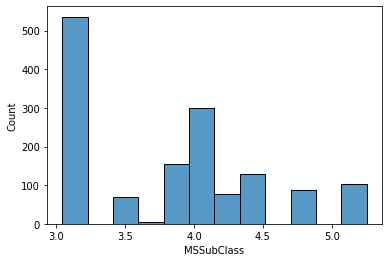

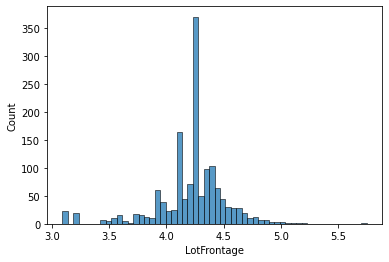

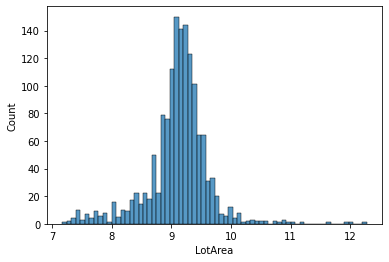

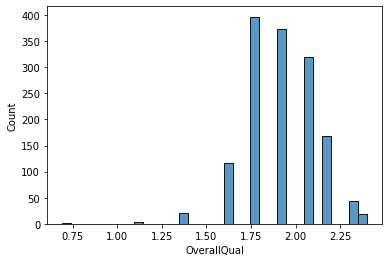

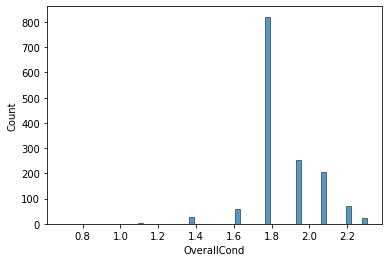

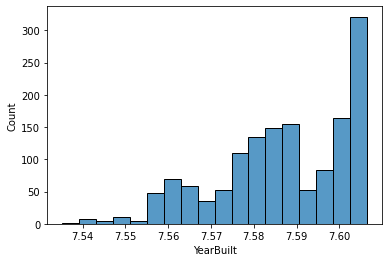

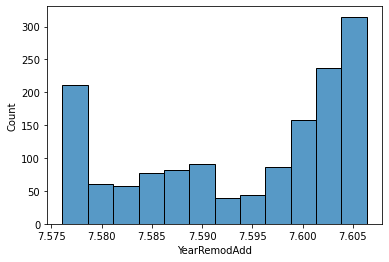

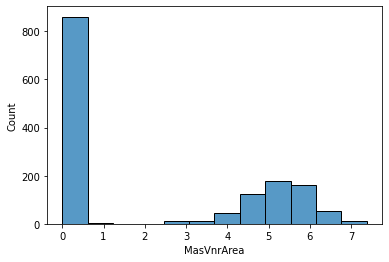

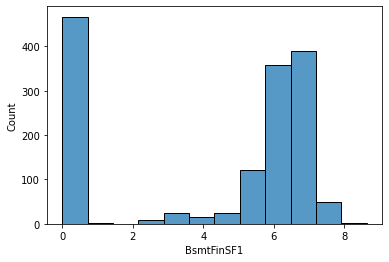

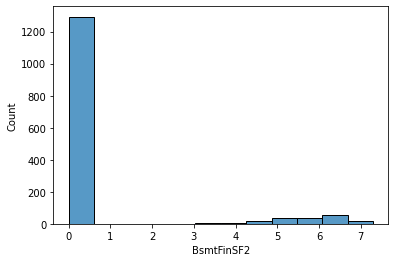

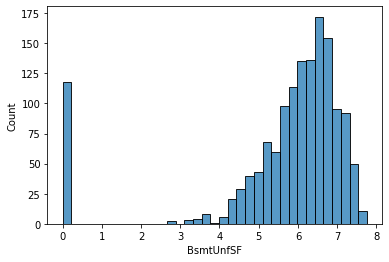

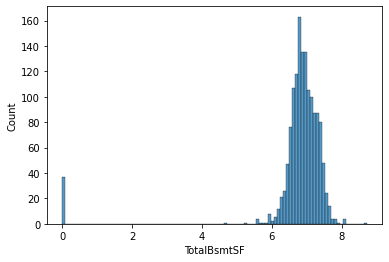

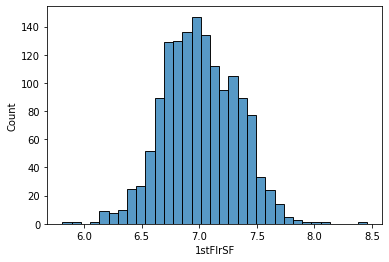

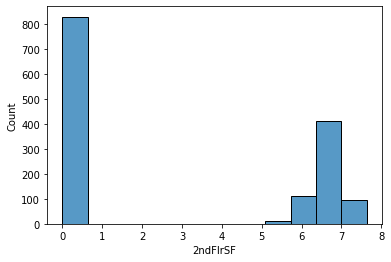

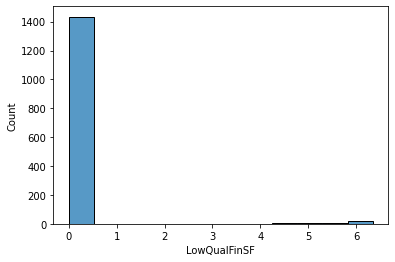

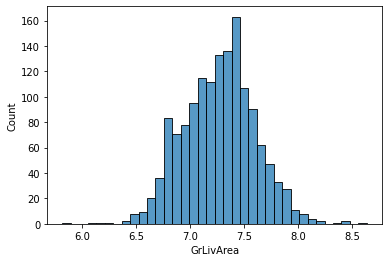

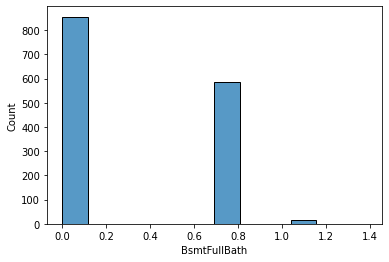

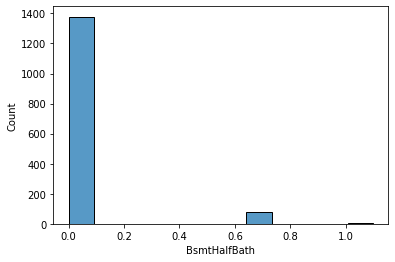

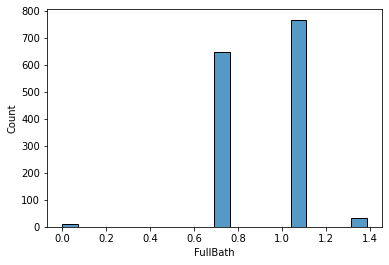

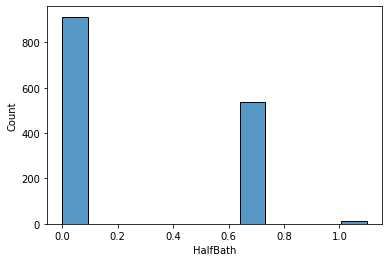

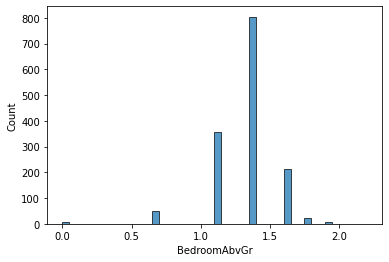

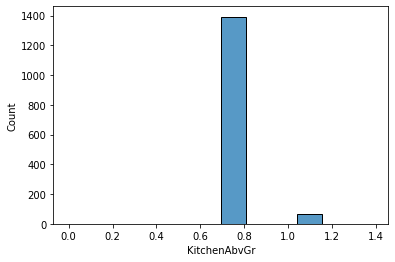

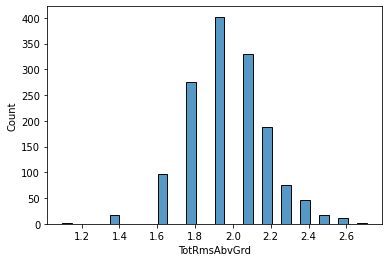

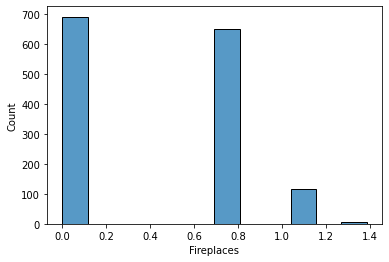

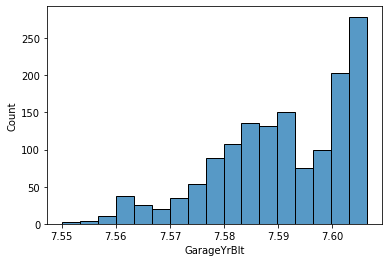

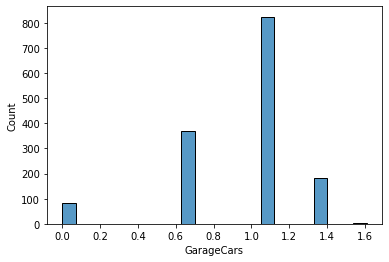

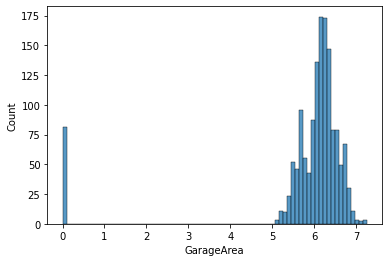

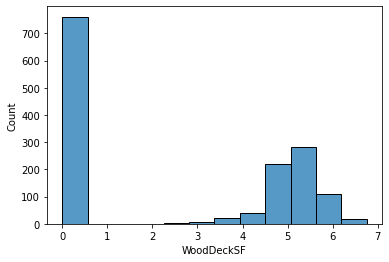

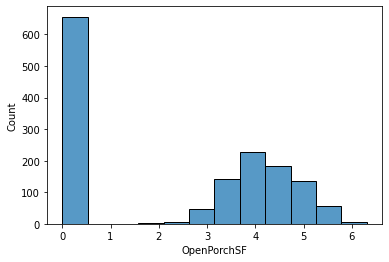

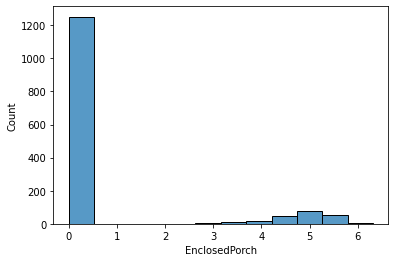

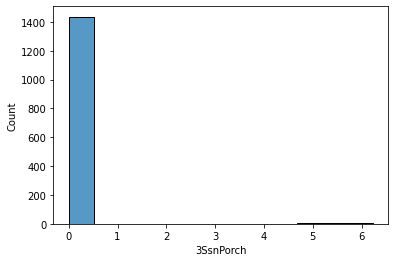

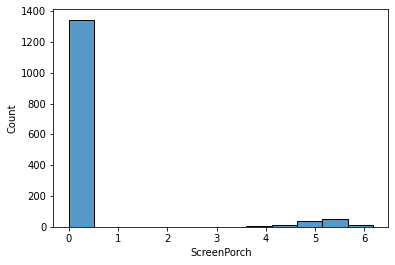

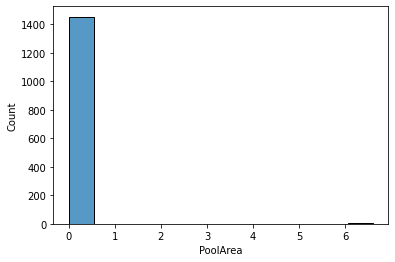

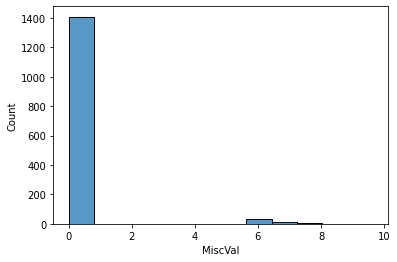

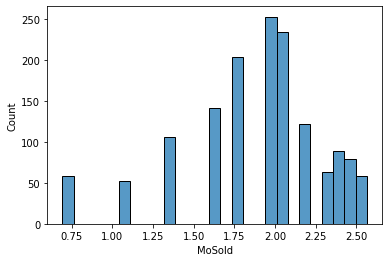

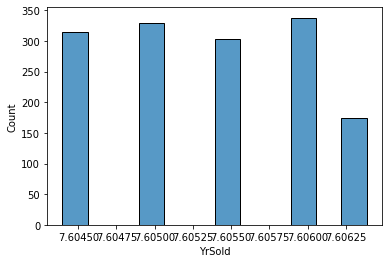

In [107]:
# 7.1 
dataframe1 = dataframe.drop(columns = ["SalePrice" , "Id"] , axis = 1)
datafame1 = dataframe1.fillna(dataframe.mean())
numeric_data = datafame1.select_dtypes(include = ['number'])
numeric_data = np.log(numeric_data+1)
for i in range(len(numeric_data.columns)):
    plt.figure(i)
    sns.histplot(numeric_data[numeric_data.columns[i]])
numeric_data = pd.get_dummies(numeric_data)
data_categorical = dataframe1.select_dtypes(include=["object"])
#7.2 
data_categorical = pd.get_dummies(data_categorical).astype(int)
print(data_categorical.shape)

map_data = pd.concat([numeric_data , data_categorical] , axis = 1)

In [108]:
# Create X 
X = map_data
X

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,...,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.110874,4.189655,9.042040,2.079442,1.791759,7.602900,7.602900,5.283204,6.561031,0.000000,5.017280,6.753438,6.753438,6.751101,0.0,7.444833,0.693147,0.000000,1.098612,0.693147,1.386294,0.693147,2.197225,0.000000,7.602900,1.098612,6.308098,0.000000,4.127134,0.000000,0.0,0.0,0.0,0.000000,1.098612,7.605392,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,3.044522,4.394449,9.169623,1.945910,2.197225,7.589336,7.589336,0.000000,6.886532,0.000000,5.652489,7.141245,7.141245,0.000000,0.0,7.141245,0.000000,0.693147,1.098612,0.000000,1.386294,0.693147,1.945910,0.693147,7.589336,1.098612,6.133398,5.700444,0.000000,0.000000,0.0,0.0,0.0,0.000000,1.791759,7.604894,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,4.110874,4.234107,9.328212,2.079442,1.791759,7.601902,7.602401,5.093750,6.188264,0.000000,6.075346,6.825460,6.825460,6.765039,0.0,7.488294,0.693147,0.000000,1.098612,0.693147,1.386294,0.693147,1.945910,0.693147,7.601902,1.098612,6.411818,0.000000,3.761200,0.000000,0.0,0.0,0.0,0.000000,2.302585,7.605392,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,4.262680,4.110874,9.164401,2.079442,1.791759,7.557995,7.586296,0.000000,5.379897,0.000000,6.293419,6.629363,6.869014,6.629363,0.0,7.448916,0.693147,0.000000,0.693147,0.000000,1.386294,0.693147,2.079442,0.693147,7.600402,1.386294,6.466145,0.000000,3.583519,5.609472,0.0,0.0,0.0,0.000000,1.098612,7.604396,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,4.110874,4.442651,9.565284,2.197225,1.791759,7.601402,7.601402,5.860786,6.486161,0.000000,6.196444,7.044033,7.044033,6.960348,0.0,7.695758,0.693147,0.000000,1.098612,0.693147,1.609438,0.693147,2.302585,0.693147,7.601402,1.386294,6.729824,5.262690,4.442651,0.000000,0.0,0.0,0.0,0.000000,2.564949,7.605392,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,4.110874,4.143135,8.976894,1.945910,1.791759,7.600902,7.601402,0.000000,0.000000,0.000000,6.860664,6.860664,6.860664,6.543912,0.0,7.407318,0.000000,0.000000,1.098612,0.693147,1.386294,0.693147,2.079442,0.693147,7.600902,1.098612,6.133398,0.000000,3.713572,0.000000,0.0,0.0,0.0,0.000000,2.197225,7.604894,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1456,3.044522,4.454347,9.486152,1.945910,1.945910,7.590347,7.595387,4.787492,6.673298,5.099866,6.380123,7.341484,7.637234,0.000000,0.0,7.637234,0.693147,0.000000,1.098612,0.000000,1.386294,0.693147,2.079442,1.098612,7.590347,1.098612,6.2166

In [109]:
# แบบไม่ take log
y = dataframe["SalePrice"]
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [110]:
from sklearn.model_selection import train_test_split
X_train , x_test , y_train , y_test = train_test_split(X,y,test_size = 0.3)

## 8. Let us first fit a very simple linear regression model, just to see what we get.

1. Use import LinearRegression from sklearn.linear model and use function `fit()` to fit the model.
2. Use function `predict()` to get house price predictions from the model (let’s call the predicted house prices yhat).
3. Plot `y` against `yhat` to see how good your predictions are.

In [111]:
# 8.1
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X,y) 

In [112]:
# 8.2
yhat = model.predict(x_test)

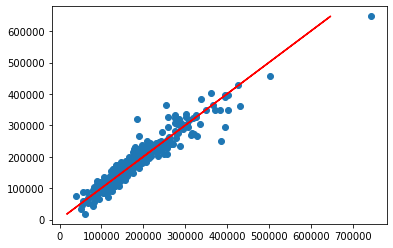

In [113]:
# 8.3 
plt.scatter(y_test , yhat);
plt.plot(yhat,model.predict(x_test), color = 'red');

## 9. Assessing Your Model

According to Kaggle’s official rule on this problem, they use root mean square errors (rmse) to judge the accuracy of our model. This error computes the dif- ference between the log of actual house prices and the log of predicted house price. Find the mean and squareroot them.

We want to see how we compare to other machine learning contestants on Kag- gle so let us compute our rmse. Luckily, sklearn has done most of the work for you by providing mean square error function. You can use it by importing the function from sklearn.metrics. Then, you can compute mean square error and take a squareroot to get rmse.

What’s the rmse of your current model? Check out Kaggle Leaderboard for this problem to see how your number measures up with the other contestants.

In [114]:
# แบบ ไม่ take log ที่ SalePrice 
import math
from sklearn.metrics import mean_squared_error
MSE2 = mean_squared_error(y_test,yhat) 
RMSE2 = math.sqrt(MSE2) 
print(f"Root Mean Square Error: {RMSE2}")

Root Mean Square Error: 22953.756088465532


## 10. Cross Validation

As we discussed earlier, don’t brag about your model’s accuracy until you have performed cross validation. Let us check cross-validated performance to avoid embarrassment.

Luckily, scikit learn has done most of the work- for us once again. You can use the function `cross_val_predict()` to train the model with cross validation method and output the predictions.

What’s the rmse of your cross-validated model? Discuss what you observe in your results here. You may try plotting this new yhat with y to get better insights about this question.

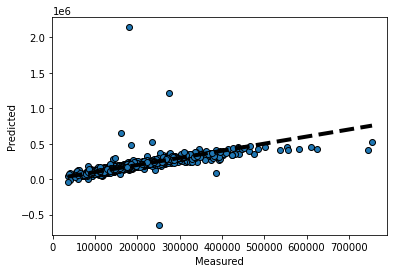

In [115]:
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
lr = linear_model.LinearRegression()
predicted = cross_val_predict(lr , X , y , cv = 10 )
fig, ax = plt.subplots()
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

## 11 (Optional) Fit Better Models
There are other models you can fit that will perform better than linear regres- sion. For example, you can fit linear regression with L2 regularization. This class of models has a street name of ‘Ridge Regression’ and sklearn simply called them Ridge. As we learned last time, this model will fight overfitting problem. Furthermore, you can try linear regression with L1 regularization (street name Lasso Regression or Lasso in sklearn). Try these models and see how you com- pare with other Kagglers now. You can write about your findings below.

In [3]:
# I used to depict linear regression as a limiting case of Ridge regression
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split , cross_val_predict

In [4]:
dataframe = pd.read_csv('/content/drive/MyDrive/AI/FRA 311 Artificial Intelligence/Labs/Lab 1/train.csv')
dataframe

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,...,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,...,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,...,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,G

In [5]:
dataframe1 = dataframe.drop(columns = ["SalePrice" , "Id"] , axis = 1)
datafame1 = dataframe1.fillna(dataframe.mean())
numeric_data = datafame1.select_dtypes(include = ['number'])
numeric_data = np.log(numeric_data+1)
# for i in range(len(numeric_data.columns)):
#     plt.figure(i)
#     sns.histplot(numeric_data[numeric_data.columns[i]])
numeric_data = pd.get_dummies(numeric_data)
data_categorical = dataframe1.select_dtypes(include=["object"])

data_categorical = pd.get_dummies(data_categorical).astype(int)
print(data_categorical.shape)

map_data = pd.concat([numeric_data , data_categorical] , axis = 1)

(1460, 252)


In [6]:
X = numeric_data
X

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,4.110874,4.189655,9.042040,2.079442,1.791759,7.602900,7.602900,5.283204,6.561031,0.000000,5.017280,6.753438,6.753438,6.751101,0.0,7.444833,0.693147,0.000000,1.098612,0.693147,1.386294,0.693147,2.197225,0.000000,7.602900,1.098612,6.308098,0.000000,4.127134,0.000000,0.0,0.0,0.0,0.000000,1.098612,7.605392
1,3.044522,4.394449,9.169623,1.945910,2.197225,7.589336,7.589336,0.000000,6.886532,0.000000,5.652489,7.141245,7.141245,0.000000,0.0,7.141245,0.000000,0.693147,1.098612,0.000000,1.386294,0.693147,1.945910,0.693147,7.589336,1.098612,6.133398,5.700444,0.000000,0.000000,0.0,0.0,0.0,0.000000,1.791759,7.604894
2,4.110874,4.234107,9.328212,2.079442,1.791759,7.601902,7.602401,5.093750,6.188264,0.000000,6.075346,6.825460,6.825460,6.765039,0.0,7.488294,0.693147,0.000000,1.098612,0.693147,1.386294,0.693147,1.945910,0.693147,7.601902,1.098612,6.411818,0.000000,3.761200,0.000000,0.0,0.0,0.0,0.000000,2.302585,7.605392
3,4.262680,4.110874,9.164401,2.079442,1.791759,7.557995,7.586296,0.000000,5.379897,0.000000,6.293419,6.629363,6.869014,6.629363,0.0,7.448916,0.693147,0.000000,0.693147,0.000000,1.386294,0.693147,2.079442,0.693147,7.600402,1.386294,6.466145,0.000000,3.583519,5.609472,0.0,0.0,0.0,0.000000,1.098612,7.604396
4,4.110874,4.442651,9.565284,2.197225,1.791759,7.601402,7.601402,5.860786,6.486161,0.000000,6.196444,7.044033,7.044033,6.960348,0.0,7.695758,0.693147,0.000000,1.098612,0.693147,1.609438,0.693147,2.302585,0.693147,7.601402,1.386294,6.729824,5.262690,4.442651,0.000000,0.0,0.0,0.0,0.000000,2.564949,7.605392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,4.110874,4.143135,8.976894,1.945910,1.791759,7.600902,7.601402,0.000000,0.000000,0.000000,6.860664,6.860664,6.860664,6.543912,0.0,7.407318,0.000000,0.000000,1.098612,0.693147,1.386294,0.693147,2.079442,0.693147,7.600902,1.098612,6.133398,0.000000,3.713572,0.000000,0.0,0.0,0.0,0.000000,2.197225,7.604894
1456,3.044522,4.454347,9.486152,1.945910,1.945910,7.590347,7.595387,4.787492,6.673298,5.099866,6.380123,7.341484,7.637234,0.000000,0.0,7.637234,0.693147,0.000000,1.098612,0.000000,1.386294,0.693147,2.079442,1.098612,7.590347,1.098612,6.216606,5.857933,0.000000,0.000000,0.0,0.0,0.0,0.000000,1.098612,7.606387
1457,4.262680,4.204693,9.109746,2.079442,2.302585,7.571474,7.604396,0.000000,5.620401,0.000000,6.777647,7.050123,7.080868,7.050123,0.0,7.758333,0.000000,0.000000,1.098612,0.000000,1.609438,0.693147,2.302585,1.098612,7.571474,0.693147,5.533389,0.000000,4.110874,0.000000,0.0,0.0,0.0,7.824446,1.791759,7.606387
1458,3.044522,4.234107,9.181735,1.791759,1.945910,7.576097,7.599401,0.000000,3.912023,6.937314,0.000000,6.983790,6.983790,0.000000,0.0,6.983790,0.693147,0.000000,0.693147,0.000000,1.098612,0.693147,1.791759,0.000000,7.576097,0.693147,5.484797,5.905362,0.000000,4.727388,0.0,0.0,0.0,0.000000,1.609438,7.606387


In [7]:
y = np.log(dataframe['SalePrice'])
y

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1460, dtype: float64

In [8]:
X_train , x_test , y_train , y_test = train_test_split(X,y,test_size = 0.3 ,
                                                      random_state = 3)

In [9]:
#Check size 
X_train.shape , x_test.shape , y_train.shape , y_test.shape

((1022, 36), (438, 36), (1022,), (438,))

In [10]:
lr = LinearRegression()
lr.fit(X_train , y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
y_pred_lr = cross_val_predict(lr, X, y, cv=10)

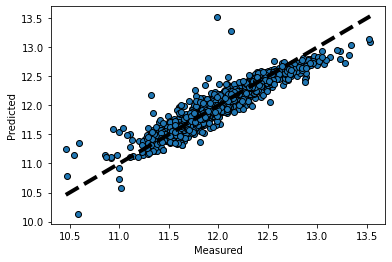

In [12]:
fig, ax = plt.subplots()
ax.scatter(y, y_pred_lr, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [13]:
rr = Ridge(alpha = 0.01)

In [14]:
# higher the alpha value, more restriction on the coefficients; low alpha > more generalization,
# in this case linear and ridge regression resembles
rr.fit(X_train , y_train)
y_pred_rr = cross_val_predict(rr, X, y, cv=10)

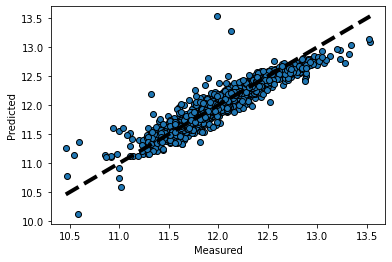

In [15]:
# plt.scatter(y_test , y_pred_rr);
# plt.plot(x_test , y_pred_rr);
fig, ax = plt.subplots()
ax.scatter(y, y_pred_rr, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [16]:
rr100 = Ridge(alpha=100) # comparison with alpha value 
rr100.fit(X_train , y_train)

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [17]:
y_pred_rr100 = cross_val_predict(rr100, X, y, cv=10)

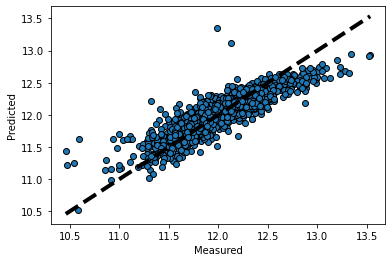

In [18]:
# plt.scatter(y_test , y_pred_rr100);
# plt.plot(x_test , y_pred_rr100);
fig, ax = plt.subplots()
ax.scatter(y, y_pred_rr100, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [19]:
# Score linear 
train_score = lr.score(X_train , y_train)
print(f"train score : {train_score}")
test_score = lr.score(x_test , y_test)
print(f"test score : {test_score}") #  ควร scale ตัวแปรให้น้อยกว่านี้ 

train score : 0.8833138314697268
test score : 0.8524721647906612


In [20]:
# Score alpha at 0.01
Ridge_train_score = rr.score(X_train,y_train)
print(f"Ridge train score alpha(0.01) : {Ridge_train_score}")
Ridge_test_score = rr.score(x_test, y_test)
print(f"Ridge test score alpha(0.01) :{Ridge_test_score}")

Ridge train score alpha(0.01) : 0.882395375363203
Ridge test score alpha(0.01) :0.8544180566113223


In [21]:
# Score alpha at 100 
Ridge_train_score100 = rr100.score(X_train,y_train)
print(f"Ridge train score aplha(100) : {Ridge_train_score100}")
Ridge_test_score100 = rr100.score(x_test, y_test)
print(f"Ridge_test_score100 alpha(100) : {Ridge_test_score100} ")

Ridge train score aplha(100) : 0.7817943864745449
Ridge_test_score100 alpha(100) : 0.7383420606859628 


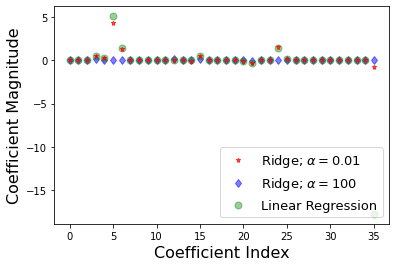

In [22]:
plt.plot(rr.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 0.01$',zorder=7) 
plt.plot(rr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$') 
plt.plot(lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.show()

In [23]:
# using Lasso regression can be depicted well by changing the regularization parameter.
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

from sklearn.linear_model import Lasso 
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import cross_val_predict , train_test_split

In [24]:
dataframe = pd.read_csv("/content/drive/MyDrive/AI/FRA 311 Artificial Intelligence/Labs/Lab 1/train.csv")
dataframe

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,...,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,...,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,...,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,G

In [25]:
dataframe.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [26]:
# 7.1 
dataframe1 = dataframe.drop(columns = ["SalePrice" , "Id"] , axis = 1)
datafame1 = dataframe1.fillna(dataframe.mean())
numeric_data = datafame1.select_dtypes(include = ['number'])
numeric_data = np.log(numeric_data+1)
# for i in range(len(numeric_data.columns)):
#     plt.figure(i)
#     sns.histplot(numeric_data[numeric_data.columns[i]])
numeric_data = pd.get_dummies(numeric_data)
data_categorical = dataframe1.select_dtypes(include=["object"])
#7.2 
data_categorical = pd.get_dummies(data_categorical).astype(int)
print(data_categorical.shape)

map_data = pd.concat([numeric_data , data_categorical] , axis = 1)

(1460, 252)


In [27]:
X = map_data
X

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,...,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.110874,4.189655,9.042040,2.079442,1.791759,7.602900,7.602900,5.283204,6.561031,0.000000,5.017280,6.753438,6.753438,6.751101,0.0,7.444833,0.693147,0.000000,1.098612,0.693147,1.386294,0.693147,2.197225,0.000000,7.602900,1.098612,6.308098,0.000000,4.127134,0.000000,0.0,0.0,0.0,0.000000,1.098612,7.605392,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,3.044522,4.394449,9.169623,1.945910,2.197225,7.589336,7.589336,0.000000,6.886532,0.000000,5.652489,7.141245,7.141245,0.000000,0.0,7.141245,0.000000,0.693147,1.098612,0.000000,1.386294,0.693147,1.945910,0.693147,7.589336,1.098612,6.133398,5.700444,0.000000,0.000000,0.0,0.0,0.0,0.000000,1.791759,7.604894,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,4.110874,4.234107,9.328212,2.079442,1.791759,7.601902,7.602401,5.093750,6.188264,0.000000,6.075346,6.825460,6.825460,6.765039,0.0,7.488294,0.693147,0.000000,1.098612,0.693147,1.386294,0.693147,1.945910,0.693147,7.601902,1.098612,6.411818,0.000000,3.761200,0.000000,0.0,0.0,0.0,0.000000,2.302585,7.605392,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,4.262680,4.110874,9.164401,2.079442,1.791759,7.557995,7.586296,0.000000,5.379897,0.000000,6.293419,6.629363,6.869014,6.629363,0.0,7.448916,0.693147,0.000000,0.693147,0.000000,1.386294,0.693147,2.079442,0.693147,7.600402,1.386294,6.466145,0.000000,3.583519,5.609472,0.0,0.0,0.0,0.000000,1.098612,7.604396,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,4.110874,4.442651,9.565284,2.197225,1.791759,7.601402,7.601402,5.860786,6.486161,0.000000,6.196444,7.044033,7.044033,6.960348,0.0,7.695758,0.693147,0.000000,1.098612,0.693147,1.609438,0.693147,2.302585,0.693147,7.601402,1.386294,6.729824,5.262690,4.442651,0.000000,0.0,0.0,0.0,0.000000,2.564949,7.605392,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,4.110874,4.143135,8.976894,1.945910,1.791759,7.600902,7.601402,0.000000,0.000000,0.000000,6.860664,6.860664,6.860664,6.543912,0.0,7.407318,0.000000,0.000000,1.098612,0.693147,1.386294,0.693147,2.079442,0.693147,7.600902,1.098612,6.133398,0.000000,3.713572,0.000000,0.0,0.0,0.0,0.000000,2.197225,7.604894,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1456,3.044522,4.454347,9.486152,1.945910,1.945910,7.590347,7.595387,4.787492,6.673298,5.099866,6.380123,7.341484,7.637234,0.000000,0.0,7.637234,0.693147,0.000000,1.098612,0.000000,1.386294,0.693147,2.079442,1.098612,7.590347,1.098612,6.2166

In [28]:
y = dataframe["SalePrice"]
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [29]:
X_train , x_test , y_train , y_test = train_test_split(X,y,test_size = 0.3)


In [30]:
lasso = Lasso()

In [31]:
lasso.fit(X_train, y_train )

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 95915232388.96187, tolerance: 576718857.8016893
  positive)


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [44]:
y_pred_lasso = cross_val_predict(lasso, X, y, cv=10)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 196613279241.6565, tolerance: 852398977.1246127
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 106579466386.71033, tolerance: 827439703.8697119
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 187659689352.30466, tolerance: 829042909.2707292
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1098717575

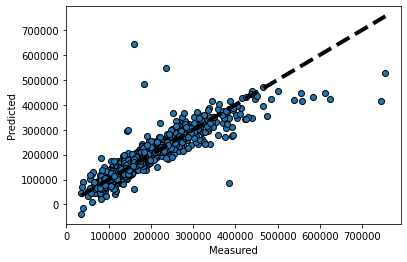

In [45]:
fig, ax = plt.subplots()
ax.scatter(y, y_pred_lasso, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [14]:
train_score = lasso.score(X_train , y_train)
train_score

0.9389602289887982

In [15]:
test_score = lasso.score(x_test , y_test)
test_score

0.7429860481249768

In [16]:
coeff_used = np.sum(lasso.coef_!=0)
coeff_used

259

In [17]:
lasso001 = Lasso(alpha=0.01 , max_iter=10e5)
lasso001.fit(X_train , y_train)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000000.0,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [18]:
y_pred_lasso001 = cross_val_predict(lasso001,X,y,cv=10)

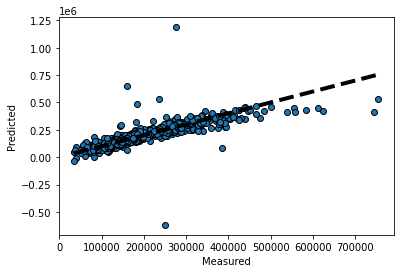

In [19]:
fig , ax = plt.subplots()
ax.scatter(y, y_pred_lasso001, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [20]:
train_score001 = lasso001.score(X_train , y_train)
train_score001

0.9392581066072778

In [21]:
test_score001 = lasso001.score(x_test , y_test)
test_score001

-2.4793200142160896

In [22]:
coeff_used001 = np.sum(lasso001.coef_!=0)
coeff_used001

266

In [23]:
temp = np.array([3.044522437723423,4.382026634673881,9.163458386076051,2.0794415416798357,1.791759469228055,7.605890001053122,7.605890001053122,5.594711379601839,0.0,0.0,7.315218389752975,7.315218389752975,7.315218389752975,0.0,0.0,7.315218389752975,0.0,0.0,1.0986122886681098,0.0,1.3862943611198906,0.6931471805599453,2.0794415416798357,0.0,7.605890001053122,1.0986122886681098,6.4692503167957724,0.0,4.74493212836325,0.0,0.0,0.0,0.0,0.0,2.302585092994046,7.605890001053122,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1])
temp

array([3.04452244, 4.38202663, 9.16345839, 2.07944154, 1.79175947,
       7.60589   , 7.60589   , 5.59471138, 0.        , 0.        ,
       7.31521839, 7.31521839, 7.31521839, 0.        , 0.        ,
       7.31521839, 0.        , 0.        , 1.09861229, 0.        ,
       1.38629436, 0.69314718, 2.07944154, 0.        , 7.60589   ,
       1.09861229, 6.46925032, 0.        , 4.74493213, 0.        ,
       0.        , 0.        , 0.        , 0.        , 2.30258509,
       7.60589   , 0.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 1.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 1.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       1.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [24]:
temp = temp.reshape(1,-1)

In [25]:
lasso001.predict(temp)

array([247613.91827424])

In [26]:
temp2 = np.array([3.044522437723423,4.330733340286331,9.222861652529854,1.9459101490553132,1.9459101490553132,7.589841512182657,7.589841512182657,0.0,6.464588303689961,5.634789603169249,5.6240175061873385,7.087573705557973,7.154615356913663,0.0,0.0,7.154615356913663,0.0,0.6931471805599453,1.0986122886681098,0.0,1.3862943611198906,0.6931471805599453,1.9459101490553132,1.0986122886681098,7.591357046698551,1.0986122886681098,6.161207321695077,5.476463551931511,4.430816798843313,0.0,0.0,0.0,0.0,0.0,1.0986122886681098,7.605392364814935,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
])
temp2

array([3.04452244, 4.33073334, 9.22286165, 1.94591015, 1.94591015,
       7.58984151, 7.58984151, 0.        , 6.4645883 , 5.6347896 ,
       5.62401751, 7.08757371, 7.15461536, 0.        , 0.        ,
       7.15461536, 0.        , 0.69314718, 1.09861229, 0.        ,
       1.38629436, 0.69314718, 1.94591015, 1.09861229, 7.59135705,
       1.09861229, 6.16120732, 5.47646355, 4.4308168 , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.09861229,
       7.60539236, 0.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 1.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 1.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       1.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.     

In [27]:
temp2 = temp2.reshape(1,-1)
temp2

array([[3.04452244, 4.33073334, 9.22286165, 1.94591015, 1.94591015,
        7.58984151, 7.58984151, 0.        , 6.4645883 , 5.6347896 ,
        5.62401751, 7.08757371, 7.15461536, 0.        , 0.        ,
        7.15461536, 0.        , 0.69314718, 1.09861229, 0.        ,
        1.38629436, 0.69314718, 1.94591015, 1.09861229, 7.59135705,
        1.09861229, 6.16120732, 5.47646355, 4.4308168 , 0.        ,
        0.        , 0.        , 0.        , 0.        , 1.09861229,
        7.60539236, 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 1.        , 1.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 1.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [28]:
lasso001.predict(temp2)

array([160749.64753096])

In [29]:
lasso00001 = Lasso(alpha = 0.0001 , max_iter=10e5)
lasso00001.fit(X_train , y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 43819471764.8255, tolerance: 661454831.884312
  positive)


Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000000.0,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [30]:
y_pred_lasso00001 = cross_val_predict(lasso00001,X,y,cv=10)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 75382943767.82715, tolerance: 852398977.1246127
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 153274814769.77637, tolerance: 827439703.8697119
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 124779134011.60754, tolerance: 829042909.2707292
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8534454321

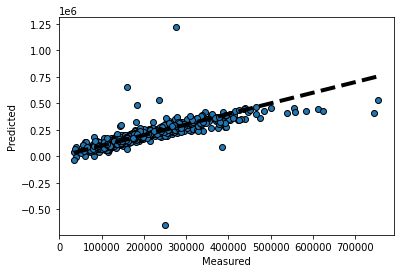

In [31]:
fig , ax = plt.subplots()
ax.scatter(y, y_pred_lasso00001, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [32]:
train_score00001 = lasso00001.score(X_train , y_train)
train_score00001

0.9392583372087879

In [33]:
test_score00001 = lasso00001.score(x_test , y_test)
test_score00001 

-2.6423077938367303

In [34]:
coeff_used00001 = np.sum(lasso00001.coef_!=0)
coeff_used00001

275

In [35]:
lr = LinearRegression()

In [36]:
lr.fit(X_train , y_train )

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
y_pred_lr = cross_val_predict(lr , X,y,cv=10)

In [38]:
lr.predict(temp)

array([247643.8111001])

In [39]:
lr.predict(temp2)

array([160750.94296555])

In [40]:
temp3 = np.array([4.394449154672439,4.2633832685897595,9.285911558823257,2.0794415416798357,1.791759469228055,7.596894438144544,7.597396320212795,4.343805421853684,0.0,0.0,5.953243334287785,5.953243334287785,6.688354713946762,6.508769136971682,0.0,7.29505641646263,0.0,0.0,1.0986122886681098,0.6931471805599453,1.3862943611198906,0.6931471805599453,2.0794415416798357,0.6931471805599453,7.596894438144544,1.0986122886681098,5.998936561946683,5.10594547390058,0.0,0.0,0.0,0.0,0.0,0.0,1.791759469228055,7.60489448081162,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
])
temp3.size

288

In [41]:
temp3 = temp3.reshape(1,-1)
temp3

array([[4.39444915, 4.26338327, 9.28591156, 2.07944154, 1.79175947,
        7.59689444, 7.59739632, 4.34380542, 0.        , 0.        ,
        5.95324333, 5.95324333, 6.68835471, 6.50876914, 0.        ,
        7.29505642, 0.        , 0.        , 1.09861229, 0.69314718,
        1.38629436, 0.69314718, 2.07944154, 0.69314718, 7.59689444,
        1.09861229, 5.99893656, 5.10594547, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 1.79175947,
        7.60489448, 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 1.        , 0.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.  

In [42]:
lr.predict(temp3)

array([139737.15695803])

In [43]:
lr_train_score = lr.score(X_train , y_train)
lr_test_score = lr.score(x_test , y_test)
print ("LR training score:", lr_train_score) 
print ("LR test score: ", lr_test_score)

LR training score: 0.9392583372318226
LR test score:  -2.6503031705655666


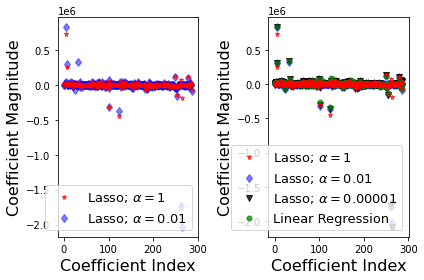

In [44]:
plt.subplot(1,2,1)
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency

plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.subplot(1,2,2)
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency
plt.plot(lasso00001.coef_,alpha=0.8,linestyle='none',marker='v',markersize=6,color='black',label=r'Lasso; $\alpha = 0.00001$') # alpha here is for transparency
plt.plot(lr.coef_,alpha=0.7,linestyle='none',marker='o',markersize=5,color='green',label='Linear Regression',zorder=2)
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.tight_layout()
plt.show()